#### Your objective is to classify fMRI brain images taken while listening to music in five different genres: label 0=Ambient Music, 1=Country Music, 2=Heavy Metal, 3=Rock 'n Roll, 4=Classical Symphonic. The data consists of train_data.csv, train_labels.csv, and test_data.csv, for a one-person subset of a larger 20-subject study, linked above.

#### The training data (train_data.csv) consist of 160 event-related brain images (trials), corresponding to twenty 6-second music clips, four clips in each of the five genres, repeated in-order eight times (runs). The labels (train_labels.csv) correspond to the correct musical genres, listed above, for each of the 160 trials.

#### There are 22036 features in each brain image, corresponding to blood-oxygenation levels at each 2mm-cubed 3D location within a section of the auditory cortex. In human brain imaging, there are often many more features (brain sites) than samples (trials), thus making the task a relatively challenging multiway classification problem.

#### The testing data (test_data.csv) consists of 40 event-related brain images corresponding to novel 6-second music clips in the five genres. The test data is in randomized order with no labels. You must predict, using only the given brain images, the correct genre labels (0-4) for the 40 test trials.


# Final Project

# "Classifying The Brain on Music"

Michael Casey, https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2017.01179/full


## **1. Multi-Class Genre Classifier** [[12 points]](https://)

#### Build a multi-class classifier for the 5 music genres. Your goal is to train a model to classify brain images into corresponding genre categories. You are free to choose any machine learning models from the class.

#### **1-1. Hyper-parameter Search.** [[4 points]](https://) Demonstrate your hyperparameter search process using cross-validation. Provide details for at least one hyperparameter with 10 different possible values.

#### **1-2. Model Training and Testing.** [[4 points]](https://) Following the hyperparameter search, train your model with the best combination of hyperparameters. Run the model on the test set and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You **must** show your test accuracy computed by Kaggle in this report.

#### **1-3. Model Analysis.** [[4 points]](https://) Conduct a thorough analysis of your model, including:

#### **1-3-1. Confusion Matrix:** Split the training set into train/validation sets. The data is organized into eight runs, in order, with each run repeating the same 20 music trials. You should split the data by run. Retrain your model using the best hyperparameter combination. Present the confusion matrix on the validation set.

#### **1-3-2. Example Examination:** Examine four validation samples where your model fails to classify into the correct category. Display the true label and the predicted label. Looking at the confusion matrix, how might you explain your results from the perspectives of human brain data and music genre similarity?


---

## **A. Data Download**

#### For your convenience, we have provided code to download the dataset, which includes true labels, training data (features), training labels, and testing data (features).


#### **A-1. Download Features and Labels.**

#### Run the following code to download the brain features and labels of the music clips.


In [1]:
import numpy as np
!pip install gdown

In [2]:
!gdown --id 1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J # train data
!gdown --id 11kgAdB_hkEcC4npCEWJcAOOmGe3495yY # train labels
!gdown --id 1wXq56F6RIUtDzPceZegZAMA-JGW21Gqu # test data

/home/jonathan/.pyenv/versions/3.12.2/envs/ml-exp/lib/python3.12/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J
To: /home/jonathan/external/le-wagon-data-science/project/project/train_data.csv
100%|██████████████████████████████████████| 89.7M/89.7M [00:25<00:00, 3.45MB/s]
/home/jonathan/.pyenv/versions/3.12.2/envs/ml-exp/lib/python3.12/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11kgAdB_hkEcC4npCEWJcAOOmGe3495yY
To: /home/jonathan/external/le-wagon-data-science/project/project/train_labels.csv
100%|██████████████████████████████████████████| 320/320 [00:00

In [1]:
# Data Import Method 1, with pandas
import pandas as pd

train_data = pd.read_csv("../train_data.csv", header=None)
train_labels = pd.read_csv("../train_labels.csv", header=None)
test_data = pd.read_csv("../test_data.csv", header=None)

print('train_data.shape: {}'.format(train_data.shape))
print('train_labels.shape: {}'.format(train_labels.shape))
print('test_data.shape: {}'.format(test_data.shape))

train_data.shape: (160, 22036)
train_labels.shape: (160, 1)
test_data.shape: (40, 22036)


#### Data exploration


In [5]:
print("\nFirst few rows of the dataset:\n")
train_data.head(2)


First few rows of the dataset:



,0,1,2,3,4,5,6,7,8,9,...,22026,22027,22028,22029,22030,22031,22032,22033,22034,22035
0,-0.742153,-0.776961,-1.482406,-2.372191,-1.397303,-1.511740,-2.833305,-1.207638,0.748228,-0.925093,...,1.700659,0.193262,-0.903444,-1.221330,-0.044282,0.356661,1.069074,1.587395,0.880437,-0.097743
1,0.706499,-3.121015,1.604055,-2.142794,-4.990133,1.331979,-0.729106,-4.301400,-0.815633,0.976097,...,-0.589694,0.620819,-0.236290,0.209095,1.578962,1.518740,0.758905,-2.542966,-0.663301,1.886257


In [17]:
print("\nDescriptive statistics for numerical columns:\n")
train_data.describe()


Descriptive statistics for numerical columns:



,0,1,2,3,4,5,6,7,8,9,...,22026,22027,22028,22029,22030,22031,22032,22033,22034,22035
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,-0.066006,-0.154871,-0.020606,-0.199492,-0.315309,0.022948,-0.177308,-0.304146,0.022068,-0.005677,...,-0.547745,-0.441539,-0.173822,-0.007579,0.095730,0.064561,0.041727,-0.111381,-0.265452,-0.223489
std,1.500774,1.676715,1.636009,1.599417,1.900022,1.932757,1.751882,1.804820,1.859196,2.062696,...,3.519517,3.312260,2.269050,1.851351,1.967000,1.815714,3.320270,3.169256,3.180904,3.128345
min,-3.380314,-3.793518,-3.758160,-4.364808,-6.444076,-4.605515,-4.875474,-6.704030,-5.600730,-5.121164,...,-14.137297,-15.444844,-8.063930,-5.977312,-4.995636,-5.088302,-9.083015,-7.866581,-10.144498,-12.688218
25%,-1.277234,-1.220757,-1.182044,-1.293862,-1.431364,-1.223549,-1.218873,-1.487742,-1.207912,-1.404501,...,-2.629624,-2.187987,-1.477697,-1.182528,-1.257316,-1.308150,-1.948154,-2.009556,-2.434278,-2.089949
50%,-0.045241,-0.070804,0.084998,-0.243672,-0.241066,0.111487,-0.343154,-0.059158,0.029654,0.105428,...,-0.407929,-0.326650,-0.228918,-0.097626,0.152068,0.039733,-0.010232,-0.239472,-0.149464,-0.303842
75%,0.729169,1.008135,0.915057,0.719409,0.728420,1.247066,0.963594,0.741256,1.391903,1.247318,...,1.635445,1.383985,1.041755,1.189738,1.335793,1.409330,2.201923,1.752236,1.403248,1.449921
max,5.342589,6.003043,5.417107,4.935417,5.761523,4.705943,5.581067,3.970444,4.880188,4.969017,...,11.662434,9.202734,5.752860,4.299949,4.982888,5.111739,8.265574,10.155688,10.912566,8.827926


In [20]:
print("\nInformation about the dataset:\n")
print(train_data.info())

print("\nShape of the dataset (rows, columns):\n")
print(train_data.shape)

print("\nData types of each column:\n")
print(train_data.dtypes)

# print(df['categorical_column'].value_counts())

print("\nNumber of missing values in each column:\n")
print(train_data.isnull().sum())


Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Columns: 22036 entries, 0 to 22035
dtypes: float64(22036)
memory usage: 26.9 MB
None

Shape of the dataset (rows, columns):

(160, 22036)

Data types of each column:

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
22031    float64
22032    float64
22033    float64
22034    float64
22035    float64
Length: 22036, dtype: object

Number of missing values in each column:

0        0
1        0
2        0
3        0
4        0
        ..
22031    0
22032    0
22033    0
22034    0
22035    0
Length: 22036, dtype: int64


#### Step 1: Split the data into training


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=42) # 70% to train

#### Step 2: Normalize the features using StandardScaler


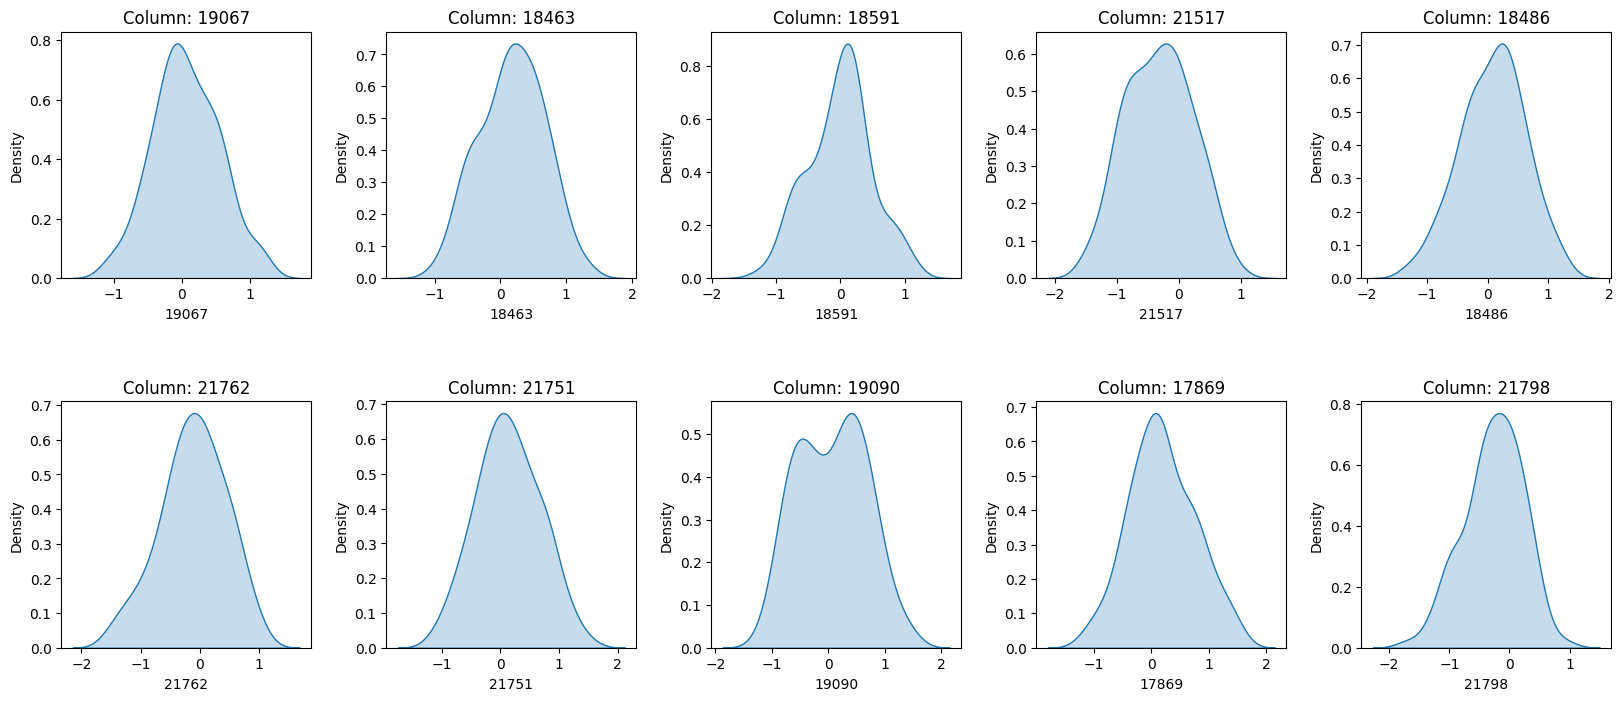

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

desc = X_train.describe()

value_diffs = desc.loc['max'] - desc.loc['min']
sorted_diffs = value_diffs.sort_values(ascending=False)

# Get the top 10 columns with the biggest differences
top_10_cols = sorted_diffs.head(10).index

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(top_10_cols):
    sns.kdeplot(data=X_train[col], ax=axes[i], fill=True)
    axes[i].set_title(f"Column: {col}")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized.shape

(112, 22036)

#### Step 3: One-hot encode the target variable


In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam

from plot_keras_history import plot_history
from sklearn.decomposition import PCA

In [40]:
input_shape = X_train_normalized[0].shape
num_classes = len(y_train_encoded[0])
reshaped_input_shape = (input_shape[0], 1)

input_shape, num_classes, reshaped_input_shape

((22036,), 5, (22036, 1))

In [ ]:
# pca = PCA(n_components=112)  # Choose the number of components based on your requirements
# X_train_pca = pca.fit_transform(X_train_normalized)
# X_test_pca = pca.transform(X_test)
# X_train_pca.shape

#### Step 4: Create a simple sequential model


In [41]:
model = Sequential()

model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=reshaped_input_shape))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/home/jonathan/.pyenv/versions/3.12.2/envs/ml-exp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 22034, 16)      │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 11017, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11015, 32)      │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5507, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 176224)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,278,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,280,357 (43.03 MB)

 Trainable params: 11,280,357 (43.03 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
es = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    X_train_normalized, y_train_encoded,
    validation_split=0.3,
    epochs=50,
    callbacks = [es],
    verbose=0)

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>],
       dtype=object))

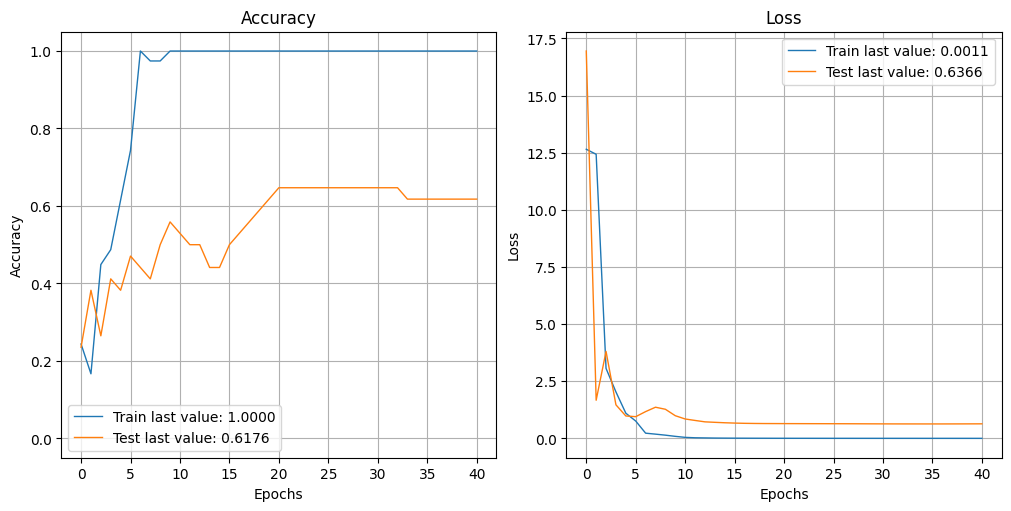

In [43]:
plot_history(history)

In [45]:
loss, accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5903 - loss: 1.0350
Test Loss: 0.9527249932289124
Test Accuracy: 0.6041666865348816
